### Grid based-filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sclibrary import dataset_loader, SCPlot


sc, coordinates = dataset_loader.load_paper_data()
# create a plot
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


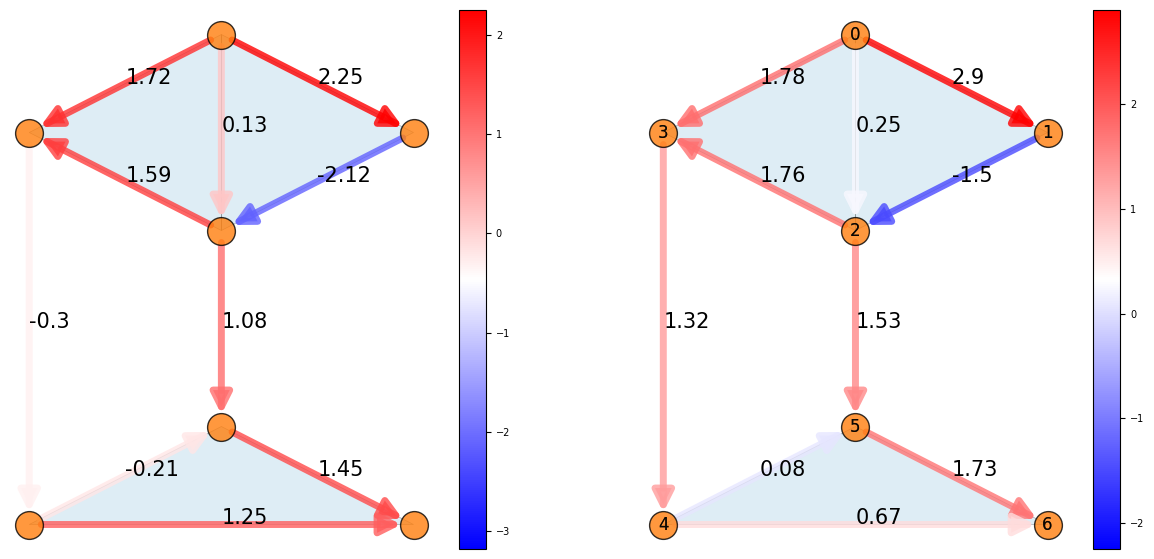

In [3]:
f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

In [4]:
from sclibrary.filters import GridBasedFilterDesign

gbf = GridBasedFilterDesign(sc)

#### Denoising

mu: 0.5, error: 2.249761243656706
Filter size: 0 - Error: 2.4411367500748042
Filter size: 1 - Error: 2.4213198902099524
Filter size: 2 - Error: 2.214470730674847
Filter size: 3 - Error: 2.23100699844834
Filter size: 4 - Error: 2.2492120061394885
Filter size: 5 - Error: 2.2507699725603985
Filter size: 6 - Error: 2.249945822504594
Filter size: 7 - Error: 2.249708768242413
Filter size: 8 - Error: 2.2497559046042794
Filter size: 9 - Error: 2.249759351107989
Filter size: 10 - Error: 2.2497216816563212
Filter size: 11 - Error: 2.2494555872698623


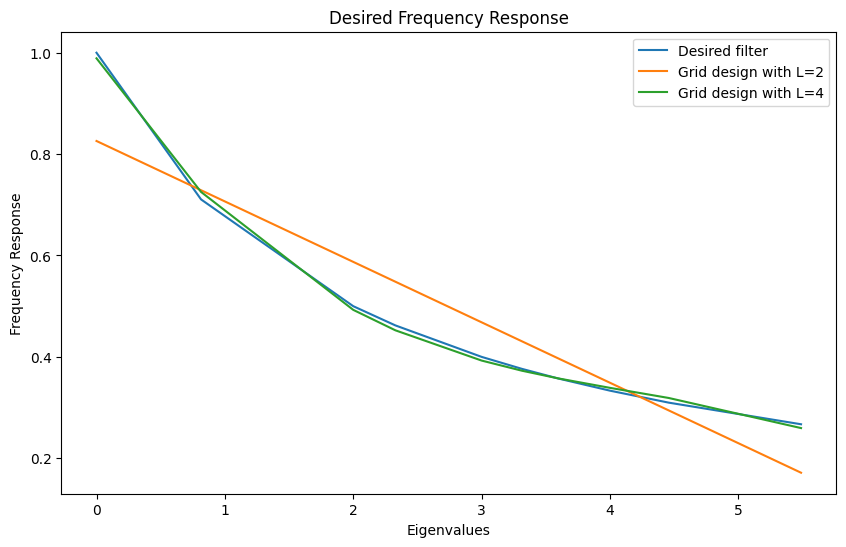

In [5]:
from sclibrary.filters import EdgeFlowDenoising
import matplotlib.pyplot as plt
from sclibrary.utils.eigendecomposition import get_eigendecomposition
   
f0 = np.array([
    -0.0689,
    -0.1378,
    0.2067,
    -0.0689,
    0.3445,
    -0.5512,
    0.5512,
    0.3675,
    0.1837,
    -0.1837,
])
 
f = np.array([
    0.8195,
    -1.2849,
    -0.8622,
    -0.8784,
    -2.5998,
    0.8872,
    0.8764,
    -0.3875,
    1.5540,
    -1.8952,
])
    
efd = EdgeFlowDenoising(simplicial_complex=sc)
efd.denoise(f=f, f_true=f0, p_choice="L1")
efd.plot_desired_frequency_response(p_choice="L1")

_, eigenvals = get_eigendecomposition(sc.hodge_laplacian_matrix())
gbf = GridBasedFilterDesign(sc)
gbf.denoise(f=f, f_true=f0,  L=12, p_choice="L1", mu=0.5)
plt.plot(eigenvals, gbf.history["frequency_responses"][1])
plt.plot(eigenvals, gbf.history["frequency_responses"][3])

plt.legend(["Desired filter", "Grid design with L=2", "Grid design with L=4"])


Filter size: 0 - Error: 2.441136750074247
Filter size: 1 - Error: 3.1096664092960715
Filter size: 2 - Error: 3.3118005001958064
Filter size: 3 - Error: 3.400003544792441
Filter size: 4 - Error: 3.4280198380467755
Filter size: 5 - Error: 3.4339917532304143
Filter size: 6 - Error: 3.434245851981434
Filter size: 7 - Error: 3.434118537261523
Filter size: 8 - Error: 3.4341447240276217
Filter size: 9 - Error: 3.4341489786302457


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


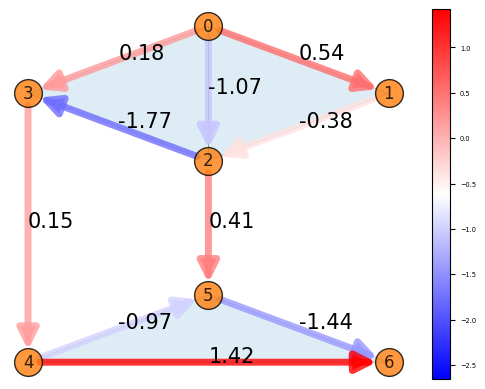

In [7]:
filter_size = 10
gbf.denoise(f=f, f_true=f0,  L=filter_size, p_choice="L1L", mu=0.5)

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### Subcomponent extraction type I - L1 = L2 = L and α = β

Filter size: 0 - Error: 2.8424428892255054
Filter size: 1 - Error: 2.9256499242707092
Filter size: 2 - Error: 2.9256499242707097
Filter size: 3 - Error: 2.807387418594163


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


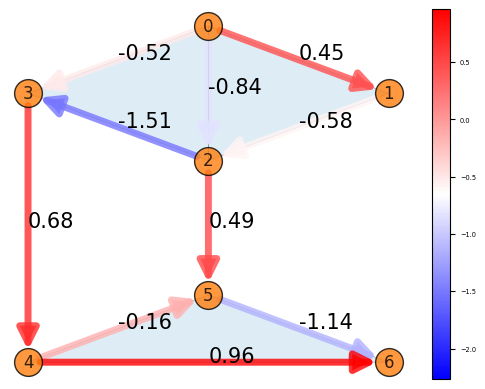

In [8]:
filter_size = 4

gbf.subcomponent_extraction(f=f, f_true=f0,  L=filter_size, p_choice="L1", component="gradient")

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### Subcomponent extraction type II - L1 != L2 and α != β

Filter size: 0 - Error: 0.8110496018470533
Filter size: 1 - Error: 0.5969063413158814
Filter size: 2 - Error: 0.3486096726639461
Filter size: 3 - Error: 0.18982938513885556
Filter size: 4 - Error: 0.06614700605774053
Filter size: 5 - Error: 0.038273600236368104
Filter size: 6 - Error: 0.01765429543469819
Filter size: 7 - Error: 0.007066962656296543
Filter size: 8 - Error: 0.0037318734003455147
Filter size: 9 - Error: 0.0016158258550859885


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


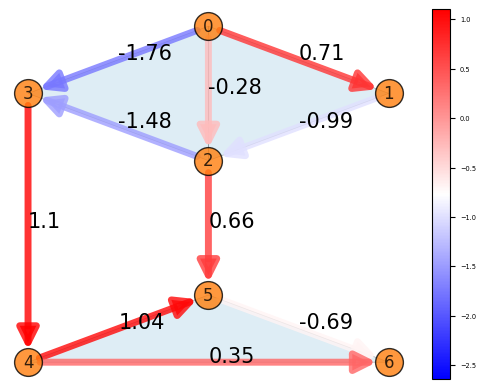

In [15]:
filter_size = 10

f_true = gbf.get_true_signal(f=f, component="gradient")
gbf.subcomponent_extraction(f=f, f_true=f_true,  L=filter_size, p_choice="L1L")

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### General Filter

Filter size: 0 - Error: 2.8424428892255054
Filter size: 0 - Error: 1.7006181885754243


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


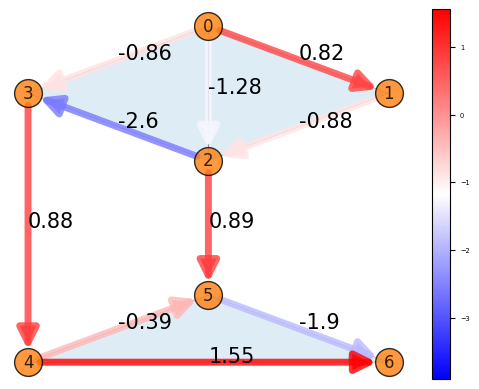

In [16]:

gbf = GridBasedFilterDesign(sc)

f_est_h, f_est_c, f_est_g = gbf.general_filter(
     f=f, f_true=f0, L1 = 1, L2 = 1
)

f_est = f_est_h + f_est_c + f_est_g

scplot.draw_network(edge_flow=np.round(f_est, 2))

In [17]:
gbf.history

{'L1': {'filter': array([[0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3]]),
  'f_estimated': array([ 0.24585, -0.38547, -0.25866, -0.26352, -0.77994,  0.26616,
          0.26292, -0.11625,  0.4662 , -0.56856]),
  'frequency_responses': array([[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]]),
  'extracted_component_error': array([1.70061819]),
  'filter_error': array([], dtype=float64)},
 'L2': {'filter': array([[0.3, 0. , 0. , 0. , 0. , 0. 